In [114]:
from image import Image
from text_recognition import text_reco
import matplotlib.pyplot as plt
import numpy as np


In [159]:

def find_team(data, h, prox_ratio=0.005):
    if data.shape[0] == 1:
        return data
    else:
        indices=[]
        for i, val1 in enumerate(data[:, 1]):
            for j, val2 in enumerate(data[i+1:, 1]):
                distance = abs(val1-val2)
                if distance < h*prox_ratio:
                    if i not in indices:
                        indices.append(i)
                    if j+i+1 not in indices:
                        indices.append(j+i+1)
        return data[indices]

def find_players(data):
    data = data[np.argsort(data[:, 1])]
    distances=data[1:, 1] - data[:-1, 1]
    indices = np.argsort(distances)[::-1]
    distances = distances[indices]
    players=None
    team_misc=0
    i=0
    while players is None and i<indices.shape[0]:
        sep_line = indices[i]+1
        grps = [data[:sep_line], data[sep_line:]]
        for i in [0, 1]:
            if grps[i].shape[0] == 11:
                return grps[i], grps[1-i]
        i += 1

    raise ValueError("The 11 players could not be distinguished from the rest")

def find_coach_and_substitutes(data):
    data = data[np.argsort(data[:, 0], axis=0)]
    sep_line = np.argmax(data[1:, 0] - data[:-1, 0])+1
    grps = [data[:sep_line], data[sep_line:]]
    vars = [grp[:, 0].var() for grp in grps]
    index = np.argmin(np.asarray(vars))
    
    return grps[index], grps[1-index]

def separate_coach_and_substitutes(data):
    data = data[np.argsort(data[:, 1])]
    indices=[2, -2]
    dists = [data[ind, 1]-data[ind-1, 1] for ind in indices]
    sep_line = indices[np.argmin(dists)]
    grps = [data[:sep_line], data[sep_line:]]
    index = np.argmax([grp.shape[0] for grp in grps])
    return grps[index][1:], grps[1-index][1:]

def find_text_categories_loc(data):
    substitutes_coach, others = find_coach_and_substitutes(data)
    substitutes, coach = separate_coach_and_substitutes(substitutes_coach)
    players, others = find_players(others)
    team = find_team(others, h, prox_ratio=0.005)
    return team, coach, players, substitutes

In [82]:
path = '../Images/psg_info.png'


img = Image(path=path, name='psg_info_out')
(h, w) = img.pix_vals.shape[:2]
    #img.resize_no_distortion()
    #img.convert_to_gray()
    #img.thresholding()
    #img.export('../Images')
textX, textY = text_reco(img.pix_vals)

[INFO] loading EAST text detector...


In [160]:
pts = np.concatenate([textX.reshape(-1, 1), textY.reshape(-1, 1)], axis=1)
team, coach, players, substitutes = find_text_categories_loc(pts)

<function matplotlib.pyplot.show(*args, **kw)>

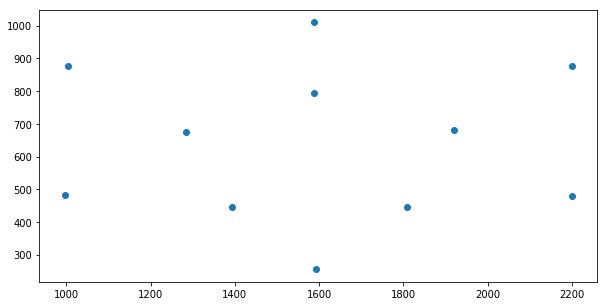

In [162]:

plt.figure(figsize=(10, 5))
#plt.scatter(pts[:, 0], pts[:, 1])
plt.scatter(players[:, 0], players[:, 1])
plt.show
#img.display()